In [14]:
import tensorflow as tf


In [6]:
import numpy as np

In [7]:
arr = np.arange(9).reshape(3,3,1)
arr

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]],

       [[6],
        [7],
        [8]]])

In [8]:
x = tf.constant(arr)
x

<tf.Tensor: shape=(3, 3, 1), dtype=int32, numpy=
array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]],

       [[6],
        [7],
        [8]]])>

In [9]:
x+x

<tf.Tensor: shape=(3, 3, 1), dtype=int32, numpy=
array([[[ 0],
        [ 2],
        [ 4]],

       [[ 6],
        [ 8],
        [10]],

       [[12],
        [14],
        [16]]])>

In [10]:
x*5

<tf.Tensor: shape=(3, 3, 1), dtype=int32, numpy=
array([[[ 0],
        [ 5],
        [10]],

       [[15],
        [20],
        [25]],

       [[30],
        [35],
        [40]]])>

In [11]:
5*x

<tf.Tensor: shape=(3, 3, 1), dtype=int32, numpy=
array([[[ 0],
        [ 5],
        [10]],

       [[15],
        [20],
        [25]],

       [[30],
        [35],
        [40]]])>

In [12]:
tf.transpose(x)

<tf.Tensor: shape=(1, 3, 3), dtype=int32, numpy=
array([[[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]]])>

In [15]:
tf.concat([x,x], axis=2)

<tf.Tensor: shape=(3, 3, 2), dtype=int32, numpy=
array([[[0, 0],
        [1, 1],
        [2, 2]],

       [[3, 3],
        [4, 4],
        [5, 5]],

       [[6, 6],
        [7, 7],
        [8, 8]]])>

In [16]:
x[:,1,0]

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 4, 7])>

In [17]:
reshaped_tensor = tf.squeeze(x[:,1,0])
reshaped_tensor = tf.cast(reshaped_tensor, dtype=tf.float32)
reshaped_tensor


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 4., 7.], dtype=float32)>

In [18]:
tf.nn.softmax(reshaped_tensor)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.00235563, 0.04731416, 0.95033026], dtype=float32)>

In [20]:
np.sum(np.arange(9))

36

In [21]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS NOT** using the GPU


In [22]:
type(x)


tensorflow.python.framework.ops.EagerTensor

In [23]:
v = tf.Variable([1,2,3,3,3,3])

In [24]:
v.assign([1,2,3,4,5,6])

<tf.Variable 'UnreadVariable' shape=(6,) dtype=int32, numpy=array([1, 2, 3, 4, 5, 6])>

In [25]:
v

<tf.Variable 'Variable:0' shape=(6,) dtype=int32, numpy=array([1, 2, 3, 4, 5, 6])>

In [26]:
v.assign_sub([1,1,1,1,1,1])

<tf.Variable 'UnreadVariable' shape=(6,) dtype=int32, numpy=array([0, 1, 2, 3, 4, 5])>

In [27]:
v - 1

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([-1,  0,  1,  2,  3,  4])>

In [28]:
v

<tf.Variable 'Variable:0' shape=(6,) dtype=int32, numpy=array([0, 1, 2, 3, 4, 5])>

In [29]:
y = v + 1 + 2*v + v**2
y

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([ 1,  5, 11, 19, 29, 41])>

In [30]:
v = tf.Variable([1.2,2,3,3,3,3])
# v = tf.cast(v, dtype=tf.float32)
with tf.GradientTape() as tape:
    z = v + 1 + 2*v + v**2
dz_dv = tape.gradient(z, v)
print(dz_dv)

tf.Tensor([5.4 7.  9.  9.  9.  9. ], shape=(6,), dtype=float32)


In [31]:
x = tf.Variable(1.0)

def f(x):
    y = x**2 + 2*x - 5
    return y
with tf.GradientTape() as tape:
    y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [32]:
@tf.function
def my_func(x):
    print('Tracing.\n')
    return tf.reduce_sum(x)

In [33]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [34]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

In [35]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

In [36]:
matplotlib.rcParams['figure.figsize']

[9.0, 6.0]

In [37]:
tf.constant([[0., 5.], [10., 40.]]).numpy()

array([[ 0.,  5.],
       [10., 40.]], dtype=float32)

In [38]:
tf.linspace([0., 5.], [10., 40.], 3, axis=1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0. ,  5. , 10. ],
       [ 5. , 22.5, 40. ]], dtype=float32)>

In [39]:
tf.transpose(tf.random.normal(shape=[10])).numpy()

array([-0.53999645, -0.40971398,  1.2912939 ,  0.3756912 ,  1.2703466 ,
        1.2018366 , -0.1253476 ,  1.5396154 ,  0.64013875,  0.8644688 ],
      dtype=float32)

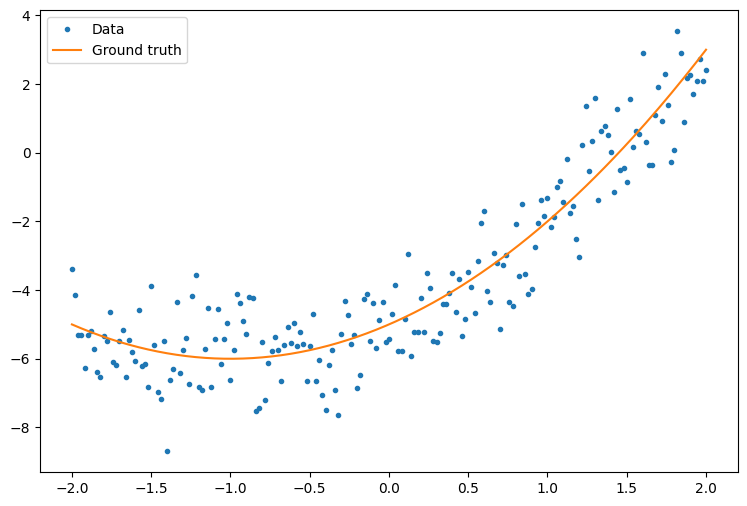

In [40]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
    y = x**2 + 2*x - 5
    return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();

In [41]:
tf.random.uniform([3,2,4], 0, 10)

<tf.Tensor: shape=(3, 2, 4), dtype=float32, numpy=
array([[[8.343498  , 9.240247  , 6.884856  , 3.6835456 ],
        [5.094025  , 9.243534  , 6.711266  , 7.841281  ]],

       [[5.789028  , 9.078823  , 0.73605895, 8.068071  ],
        [0.46931148, 0.80753446, 8.944803  , 6.450554  ]],

       [[3.9655006 , 9.422123  , 7.4107075 , 5.5619287 ],
        [8.98131   , 6.066269  , 1.8558276 , 9.426723  ]]], dtype=float32)>

In [42]:
class Model(tf.Module):
    
    def __init__(self):
        random_init = tf.random.uniform([3], 0, 5, dtype=tf.float32, seed=69)
        self.W_1 = tf.Variable(random_init[0], name='W_1')
        self.W_2 = tf.Variable(random_init[1], name='W_2')
        self.b = tf.Variable(random_init[2], name='b')
        
    def __call__(self, x):
        return self.W_2 * x**2 + self.W_1 * x + self.b

In [43]:
model = Model()

In [44]:
def plot_preds(x, y, f, model, title):
    plt.figure()
    plt.plot(x, y, '.', label='Data')
    plt.plot(x, f(x), label='Ground truth')
    plt.plot(x, model(x), label='Predictions')
    plt.title(title)
    plt.legend()

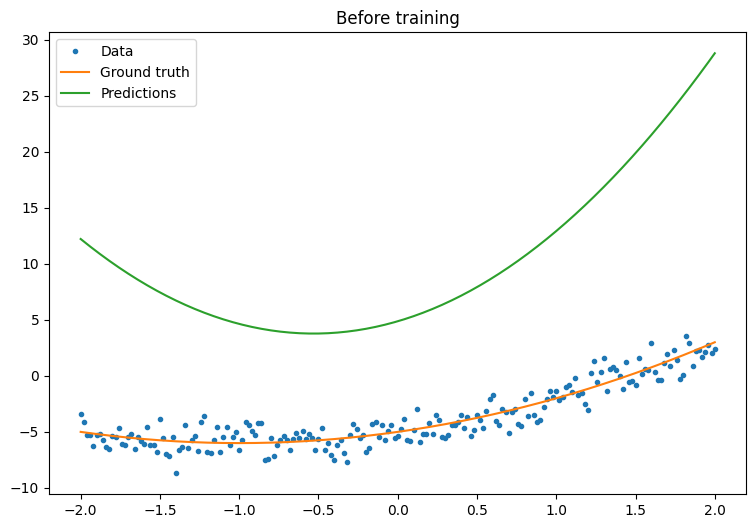

In [45]:
plot_preds(x, y, f, model, 'Before training')

In [46]:
def mse_loss(y_true, y_pred):
    return tf.reduce_mean((y_true - y_pred)**2)

In [47]:
list(tf.data.Dataset.from_tensor_slices((x, y)))

[(<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-3.3836212>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.98>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-4.152987>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.96>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-5.3111124>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.94>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-5.306041>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.92>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-6.265407>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.9>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-5.311178>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.88>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-5.2052774>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.86>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-5.7161593>),
 (<tf.Tensor: shape=(), dtype=float32, numpy=-1.84>,
  <tf.Tensor: shape=(), dtype=float32, numpy=-6.377887>),

In [48]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [49]:
list(dataset)[-1]

(<tf.Tensor: shape=(9,), dtype=float32, numpy=
 array([-0.14,  0.08, -1.58, -0.34,  0.12,  1.72,  0.4 ,  0.88, -1.  ],
       dtype=float32)>,
 <tf.Tensor: shape=(9,), dtype=float32, numpy=
 array([-4.1122217, -5.777771 , -4.578263 , -6.9002295, -2.940331 ,
         0.9191616, -3.4934936, -4.1228914, -6.615764 ], dtype=float32)>)

In [50]:
model.variables

(<tf.Variable 'W_1:0' shape=() dtype=float32, numpy=4.1439056>,
 <tf.Variable 'W_2:0' shape=() dtype=float32, numpy=3.9076905>,
 <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.8737946>)

(<tf.Tensor: shape=(), dtype=float32, numpy=-1.3030083>, <tf.Tensor: shape=(), dtype=float32, numpy=33.0432>, <tf.Tensor: shape=(), dtype=float32, numpy=25.65961>)

(<tf.Tensor: shape=(), dtype=float32, numpy=22.09642>, <tf.Tensor: shape=(), dtype=float32, numpy=44.59726>, <tf.Tensor: shape=(), dtype=float32, numpy=28.255264>)

(<tf.Tensor: shape=(), dtype=float32, numpy=-3.940842>, <tf.Tensor: shape=(), dtype=float32, numpy=49.14047>, <tf.Tensor: shape=(), dtype=float32, numpy=24.521534>)

(<tf.Tensor: shape=(), dtype=float32, numpy=3.9683483>, <tf.Tensor: shape=(), dtype=float32, numpy=38.777924>, <tf.Tensor: shape=(), dtype=float32, numpy=22.477364>)

(<tf.Tensor: shape=(), dtype=float32, numpy=10.568065>, <tf.Tensor: shape=(), dtype=float32, numpy=30.429287>, <tf.Tensor: shape=(), dtype=float32, numpy=22.164757>)

(<tf.Tensor: shape=(), dtype=float32, numpy=4.551807>, <tf.Tensor: shape=(), dtype=float32, numpy=26.93372>, <tf.Tensor: shape=(), dtype=float32, numpy=19.561325>)

(<tf.

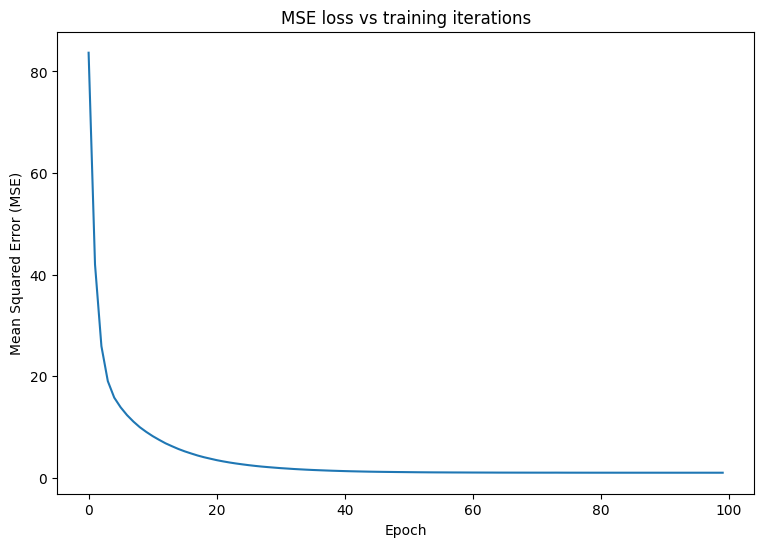

In [51]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
    for x_batch, y_batch in dataset:
        with tf.GradientTape() as tape:
            batch_loss = mse_loss(model(x_batch), y_batch)
        # Update parameters with respect to the gradient calculations
        grads = tape.gradient(batch_loss, model.variables)
        print(grads,end="\n\n")
        for g,v in zip(grads, model.variables):
            v.assign_sub(learning_rate*g)
    # Keep track of model loss per epoch
    loss = mse_loss(model(x), y)
    losses.append(loss)
    if epoch % 10 == 0:
        print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');

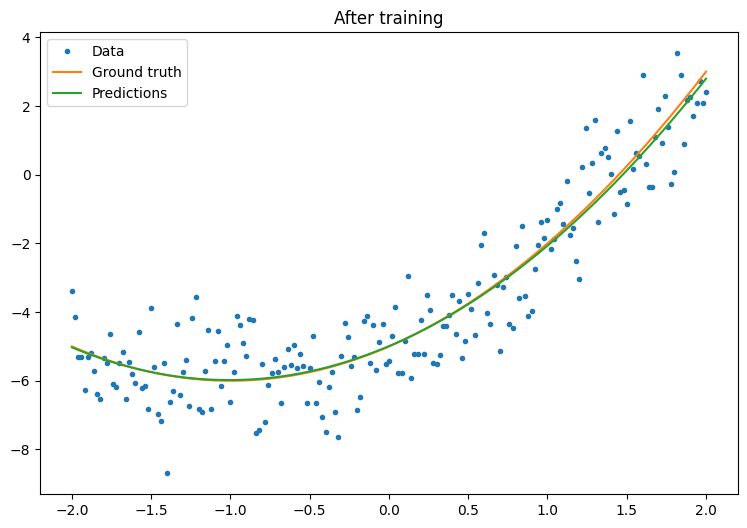

In [52]:
plot_preds(x, y, f, model, 'After training')


In [53]:
x

<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([-2.  , -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84,
       -1.82, -1.8 , -1.78, -1.76, -1.74, -1.72, -1.7 , -1.68, -1.66,
       -1.64, -1.62, -1.6 , -1.58, -1.56, -1.54, -1.52, -1.5 , -1.48,
       -1.46, -1.44, -1.42, -1.4 , -1.38, -1.36, -1.34, -1.32, -1.3 ,
       -1.28, -1.26, -1.24, -1.22, -1.2 , -1.18, -1.16, -1.14, -1.12,
       -1.1 , -1.08, -1.06, -1.04, -1.02, -1.  , -0.98, -0.96, -0.94,
       -0.92, -0.9 , -0.88, -0.86, -0.84, -0.82, -0.8 , -0.78, -0.76,
       -0.74, -0.72, -0.7 , -0.68, -0.66, -0.64, -0.62, -0.6 , -0.58,
       -0.56, -0.54, -0.52, -0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 ,
       -0.38, -0.36, -0.34, -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22,
       -0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,
       -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
        0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,
        0.34,  0.36,  0.38,  0.4 ,  0.42, 

In [54]:
np.array(x[:10])

array([-2.  , -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84,
       -1.82], dtype=float32)

In [55]:
tensor_1 = tf.random.normal(shape=(2, 3, 3, 2))
tensor_2 = tf.random.normal(shape=(2, 3, 2, 4))


In [56]:
tensor_1

<tf.Tensor: shape=(2, 3, 3, 2), dtype=float32, numpy=
array([[[[ 0.05452649, -1.1765611 ],
         [ 0.07634619, -1.3578233 ],
         [ 1.2604065 ,  2.1619024 ]],

        [[-0.46659973, -0.05190522],
         [-0.6705971 ,  0.8665701 ],
         [-2.0134697 , -1.4264826 ]],

        [[ 0.32316294,  0.1751282 ],
         [ 1.5953087 ,  1.2173895 ],
         [-0.17606759,  0.976821  ]]],


       [[[ 0.2188622 ,  1.2192837 ],
         [-0.74039656, -0.17280677],
         [-1.7130225 , -0.42853376]],

        [[ 0.19903843, -0.35816568],
         [ 0.01683895,  1.3675845 ],
         [-0.2468591 , -0.42328405]],

        [[ 1.7717439 , -0.3253727 ],
         [ 0.09006997,  1.5060983 ],
         [-2.6048527 , -0.67899317]]]], dtype=float32)>

In [57]:
tensor_2

<tf.Tensor: shape=(2, 3, 2, 4), dtype=float32, numpy=
array([[[[ 1.188929  ,  0.02157709, -0.9849405 , -1.5472889 ],
         [ 0.49326885,  0.27409706,  0.7997807 ,  0.5873172 ]],

        [[-0.13600813,  1.1703802 ,  1.4148077 ,  0.14265989],
         [ 1.2319802 , -0.9268141 , -1.4324133 ,  0.70916694]],

        [[-1.8728211 ,  2.0004425 , -0.19693205,  0.07989715],
         [-0.82242626,  1.852535  , -1.1873343 ,  0.9649277 ]]],


       [[[-1.1900535 ,  1.2626369 , -1.4716756 , -1.1278157 ],
         [ 1.0338515 , -1.5736271 , -1.6866748 , -0.36858442]],

        [[ 0.97294205,  1.2610594 ,  0.86902475, -0.20394857],
         [-0.62756073, -0.6093461 , -0.16408567, -0.37565607]],

        [[-1.9344311 , -0.392811  ,  0.14720903, -0.01025101],
         [ 1.7282252 ,  0.88417196,  0.8934259 , -0.22677651]]]],
      dtype=float32)>

In [58]:

tensor_1 @ tensor_2

<tf.Tensor: shape=(2, 3, 3, 4), dtype=float32, numpy=
array([[[[-5.1553285e-01, -3.2131541e-01, -9.9469626e-01,
          -7.7538282e-01],
         [-5.7900172e-01, -3.7052801e-01, -1.1611574e+00,
          -9.1560262e-01],
         [ 2.5649328e+00,  6.1976701e-01,  4.8762250e-01,
          -6.8049043e-01]],

        [[-4.8485043e-04, -4.9799263e-01, -5.8579910e-01,
          -1.0337453e-01],
         [ 1.1588039e+00, -1.5880029e+00, -2.1900525e+00,
           5.1887560e-01],
         [-1.4835501e+00, -1.0344411e+00, -8.0535972e-01,
          -1.2988557e+00]],

        [[-7.4925643e-01,  9.7090000e-01, -2.7157685e-01,
           1.9480585e-01],
         [-3.9889407e+00,  5.4465799e+00, -1.7596157e+00,
           1.3021533e+00],
         [-4.7362015e-01,  1.4573821e+00, -1.1251397e+00,
           9.2849433e-01]]],


       [[[ 1.0001006e+00, -1.6423544e+00, -2.3786292e+00,
          -6.9624519e-01],
         [ 7.0245498e-01, -6.6291857e-01,  1.3810924e+00,
           8.9872473e-01],
   

In [59]:
c = tf.constant([[4.0, 1.0], [10.0, 5.0]])
c

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 4.,  1.],
       [10.,  5.]], dtype=float32)>

In [60]:

# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.math.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 1], shape=(2,), dtype=int64)
tf.Tensor(
[[0.95257413 0.04742587]
 [0.9933072  0.00669285]], shape=(2, 2), dtype=float32)


In [61]:
type(c.shape)

tensorflow.python.framework.tensor_shape.TensorShape

In [62]:
tf.convert_to_tensor(c.shape)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 2])>

In [63]:
tf.size(x).numpy()

201

In [64]:
tf.shape(c)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 2])>

In [65]:
tf.rank(c)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [66]:
t2 = tf.constant([[0, 1, 2, 3, 4],
                    [5, 6, 7, 8, 9],
                    [10, 11, 12, 13, 14],
                    [15, 16, 17, 18, 19]])
t2

<tf.Tensor: shape=(4, 5), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])>

In [72]:
test = tf.random.uniform((4,2,3,2))
test

<tf.Tensor: shape=(4, 2, 3, 2), dtype=float32, numpy=
array([[[[0.08625233, 0.4061849 ],
         [0.65552914, 0.07730126],
         [0.637063  , 0.1451236 ]],

        [[0.57024884, 0.4421817 ],
         [0.75497663, 0.5710076 ],
         [0.3599075 , 0.81935096]]],


       [[[0.45919573, 0.74812937],
         [0.65013814, 0.60215807],
         [0.7350291 , 0.26422703]],

        [[0.09411073, 0.67996585],
         [0.7514638 , 0.5254272 ],
         [0.44127166, 0.96240175]]],


       [[[0.9119222 , 0.3499508 ],
         [0.03861904, 0.93332744],
         [0.19111991, 0.07868588]],

        [[0.97547376, 0.9144392 ],
         [0.23383117, 0.12469423],
         [0.41991925, 0.8912289 ]]],


       [[[0.0010463 , 0.6195513 ],
         [0.47203612, 0.2132535 ],
         [0.66966736, 0.9906169 ]],

        [[0.5893023 , 0.5751871 ],
         [0.85714495, 0.16045463],
         [0.8476691 , 0.9468216 ]]]], dtype=float32)>

In [77]:
tf.reshape(test, (48,1))

<tf.Tensor: shape=(48, 1), dtype=float32, numpy=
array([[0.08625233],
       [0.4061849 ],
       [0.65552914],
       [0.07730126],
       [0.637063  ],
       [0.1451236 ],
       [0.57024884],
       [0.4421817 ],
       [0.75497663],
       [0.5710076 ],
       [0.3599075 ],
       [0.81935096],
       [0.45919573],
       [0.74812937],
       [0.65013814],
       [0.60215807],
       [0.7350291 ],
       [0.26422703],
       [0.09411073],
       [0.67996585],
       [0.7514638 ],
       [0.5254272 ],
       [0.44127166],
       [0.96240175],
       [0.9119222 ],
       [0.3499508 ],
       [0.03861904],
       [0.93332744],
       [0.19111991],
       [0.07868588],
       [0.97547376],
       [0.9144392 ],
       [0.23383117],
       [0.12469423],
       [0.41991925],
       [0.8912289 ],
       [0.0010463 ],
       [0.6195513 ],
       [0.47203612],
       [0.2132535 ],
       [0.66966736],
       [0.9906169 ],
       [0.5893023 ],
       [0.5751871 ],
       [0.85714495],
      

In [79]:
tf.broadcast_to(tf.random.uniform([1,2]), (4,2,))

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.708503 , 0.8876878],
       [0.708503 , 0.8876878],
       [0.708503 , 0.8876878],
       [0.708503 , 0.8876878]], dtype=float32)>